In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import createXYPlot
from utils import getVariables
from datetime import datetime

today = str(datetime.now().date())
print(today)
plots_folder = f"./plots/{today}/iss"
os.system(f"mkdir -p {plots_folder}")

2022-03-27


0

In [39]:
def plot_incidence(split, age):
    createXYPlot(df_plt,
             x="data",
             y=["no_vax_100k",
                "vax_100k",
                "1_dose_100k",
                "2_dosi_lt_cut_100k", 
                "2_dosi_gt_cut_100k", 
                "booster_100k"],
                error=True,
                alpha_err=0.1,
                labels=["non vaccinati",
                        "vaccinati",
                        "1 dose",
                        "2_dosi < 120gg",
                        "2_dosi > 120gg",
                        "booster"],
                plots_folder=plots_folder,
                title=f"Incidenza {split} mensili per 100k - dati ISS - {age}",
                figsize_x=10,
                figsize_y=5,
                dpis=90,
                linewidth=1.5,
                ytitle=f"N. {s} per 100k".replace("_"," "),
                savename=f"incidenza_{split}_{age}_per_100k",
                days_interval=1)

In [41]:
def plot_efficacy(age, split):
    createXYPlot(df_plt,
                x="data",
                y=["eff_vax"],
                plots_folder=plots_folder,
                title=f"Efficacia {split} - {age}".replace("_"," "),
                error=True,
                figsize_x=10,
                figsize_y=5,
                dpis=90,
                linewidth=1.5,
                ytitle="[%]",
                savename=f"efficacia_{split}_{age}",
                days_interval=1)

In [44]:
def plot_arr(age, split):
    createXYPlot(df_plt,
                     x="data",
                     y=["arr_vax"],
                     plots_folder=plots_folder,
                     title=f"Riduzione rischio assoluto {split} - {age}".replace("_"," "),
                     error=True,
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90,
                     linewidth=1.5,
                     ytitle="[%]",
                     savename=f"arr_{split}_{age}",
                     days_interval=1)

### Iss data

In [2]:
df_ti = pd.read_csv("./data/rapporti_ISS - TI.csv")
df_decessi = pd.read_csv("./data/rapporti_ISS - Decessi.csv")
df_ricoveri = pd.read_csv("./data/rapporti_ISS - Ricoveri.csv")
df_contagi = pd.read_csv("./data/rapporti_ISS - Contagi.csv")
df_pop = pd.read_csv("./data/rapporti_ISS - Popolazione.csv")

In [3]:
cols_to_select = [x for x in df_pop.columns if "frac" not in x and x != "cut"]
df_pop = df_pop[cols_to_select]
df_pop["data"] = pd.to_datetime(df_pop["data"]).dt.date
df_pop = df_pop.rename(columns={"data":"data_pop"})

In [4]:
df_dict = {
    "contagi": df_contagi,
    "ricoveri": df_ricoveri,
    "terapie_intensive": df_ti, 
    "decessi": df_decessi
}

In [5]:
for d in df_dict.items():
    d[1]["split"] = d[0]

In [6]:
df_iss = pd.concat(df_dict.values()).reset_index(drop=True)
df_iss["tot"] = df_iss["vax"] + df_iss["no_vax"]
df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date

In [14]:
df_iss

,data,fascia_eta,no_vax,1_dose,2_dosi_lt_cut,2_dosi_gt_cut,booster,vax,no_vax_frac,1_dose_frac,...,arr_2_dosi_gt_cut,err_arr_2_dosi_gt_cut,booster_100k,booster_100k_sd,err_booster_100k,eff_booster,eff_booster_sd,err_eff_booster,arr_booster,err_arr_booster
0,2021-11-07,12-39,18568,1513,11624,1535,21,14693,0.5583,0.0455,...,0.261382,0.012051,168.634064,36.767929,60.483243,66.859456,7.229830,11.893071,0.340211,0.060793
1,2021-11-07,40-59,15027,1284,17003,2604,48,20939,0.4178,0.0357,...,0.221607,0.010657,99.442706,14.346180,23.599466,79.467976,2.966777,4.880349,0.384887,0.024474
2,2021-11-07,60-79,5364,551,12680,1202,77,14510,0.2699,0.0277,...,0.164640,0.014657,84.147488,9.585461,15.768083,79.314103,2.373183,3.903886,0.322639,0.018215
3,2021-11-07,80+,1223,118,2621,2747,140,5626,0.1786,0.0172,...,0.371314,0.025144,98.251819,8.299714,13.653030,81.317453,1.665704,2.740083,0.427650,0.028198
4,2021-11-07,totale,40182,3466,43928,8088,286,55768,0.4188,0.0361,...,0.275759,0.005493,97.041589,5.735405,9.434740,79.948156,1.189309,1.956413,0.386912,0.010233
5,2021-11-14,12-39,23176,1668,16872,2163,44,20747,0.5277,0.0380,...,0.337730,0.014022,173.576867,26.144977,43.008487,74.358819,3.865843,6.359312,0.503369,0.043622
6,2021-11-14,40-59,19051,1504,23669,3395,103,28671,0.3992,0.0315,...,0.318496,0.012109,131.287124,12.927610,21.265919,79.789281,1.995458,3.282529,0.518304,0.022623
7,2021-11-14,60-79,6797,657,17109,1817,136,19719,0.2563,0.0248,...,0.230176,0.015710,102.287941,8.766631,14.421109,80.758039,1.665487,2.739727,0.429300,0.017885
8,2021-11-14,80+,1540,151,2757,3840,254,7002,0.1803,0.0177,...,0.476785,0.028764,76.214252,4.780285,7.863569,88.737810,0.762090,1.253639,0.600512,0.029344
9,2021-11-14,totale,50564,3980,60407,11215,537,76139,0.3991,0.0314,...,0.375208,0.006266,94.205238,4.063341,6.684196,85.351337,0.635167,1.044849,0.548893,0.008165


In [7]:
df_iss.groupby("data").count()

,fascia_eta,no_vax,1_dose,2_dosi_lt_cut,2_dosi_gt_cut,booster,vax,no_vax_frac,1_dose_frac,2_dosi_lt_cut_frac,2_dosi_gt_cut_frac,booster_frac,vax_frac,cut,split,tot
data,,,,,,,,,,,,,,,,
2021-10-17,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
2021-10-24,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2021-10-31,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2021-11-07,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2021-11-14,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2021-11-21,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2021-11-28,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2021-12-05,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2021-12-12,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


In [8]:
age_values = df_iss["fascia_eta"].unique()
splits = df_iss["split"].unique()

In [9]:
from datetime import timedelta
df_iss["data_pop"] = df_iss["data"].apply(lambda x: x - timedelta(14))

In [10]:
df_iss = df_iss.merge(df_pop, on=["data_pop","fascia_eta"], how="left", suffixes=("","_pop"))

### Incidence

In [11]:
df_iss.columns

Index(['data', 'fascia_eta', 'no_vax', '1_dose', '2_dosi_lt_cut',
       '2_dosi_gt_cut', 'booster', 'vax', 'no_vax_frac', '1_dose_frac',
       '2_dosi_lt_cut_frac', '2_dosi_gt_cut_frac', 'booster_frac', 'vax_frac',
       'cut', 'split', 'tot', 'data_pop', 'no_vax_pop', '1_dose_pop',
       '2_dosi_lt_cut_pop', '2_dosi_gt_cut_pop', 'booster_pop', 'vax_pop',
       'tot_pop'],
      dtype='object')

In [12]:
vnames = ["no_vax", "vax", "1_dose", "2_dosi_lt_cut", "2_dosi_gt_cut", "booster"]
for v in vnames:
    df_iss[f"{v}_100k"] = 1e5 * df_iss[v]/df_iss[f"{v}_pop"]
    df_iss[f"{v}_100k_sd"] = 1e5 * np.sqrt((df_iss[v]/df_iss[f"{v}_pop"]) * (1 - df_iss[v]/df_iss[f"{v}_pop"]) / df_iss[f"{v}_pop"])
    df_iss[f"err_{v}_100k"] = 1.645 * df_iss[f"{v}_100k_sd"]
    if vnames != "no_vax":
        df_iss[f"eff_{v}"] = 100 * (1 - df_iss[f"{v}_100k"]/df_iss[f"no_vax_100k"])
        df_iss[f"eff_{v}_sd"] = 100 * np.sqrt((df_iss[f"no_vax_100k"]**-2 * df_iss[f"{v}_100k_sd"]**2 + 
                                              df_iss[f"no_vax_100k"]**-4 * df_iss[f"{v}_100k"]**2 * df_iss[f"no_vax_100k_sd"]**2))
        df_iss[f"err_eff_{v}"] = 1.645 * df_iss[f"eff_{v}_sd"]
        df_iss[f"arr_{v}"] = (df_iss[f"no_vax_100k"] - df_iss[f"{v}_100k"]) / 1000
        df_iss[f"err_arr_{v}"] = 1.645 * np.sqrt(df_iss[f"no_vax_100k_sd"]**2 + df_iss[f"{v}_100k_sd"]**2) / 1000


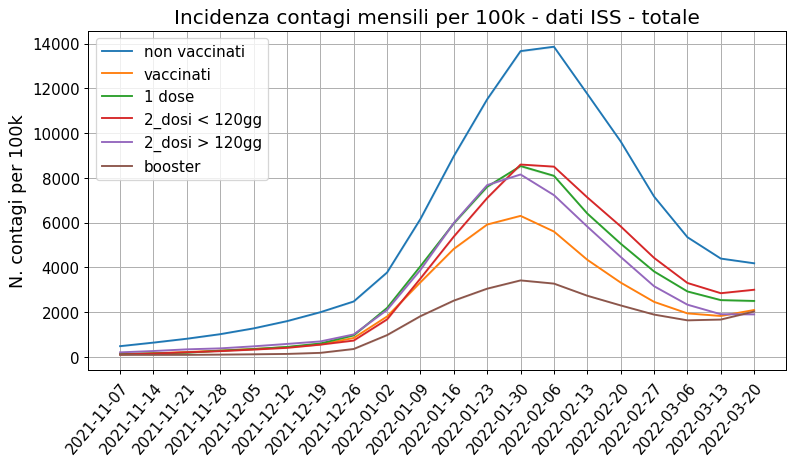

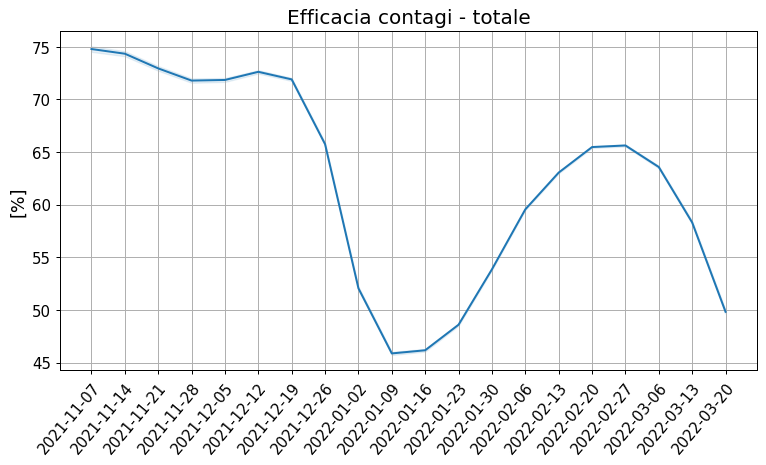

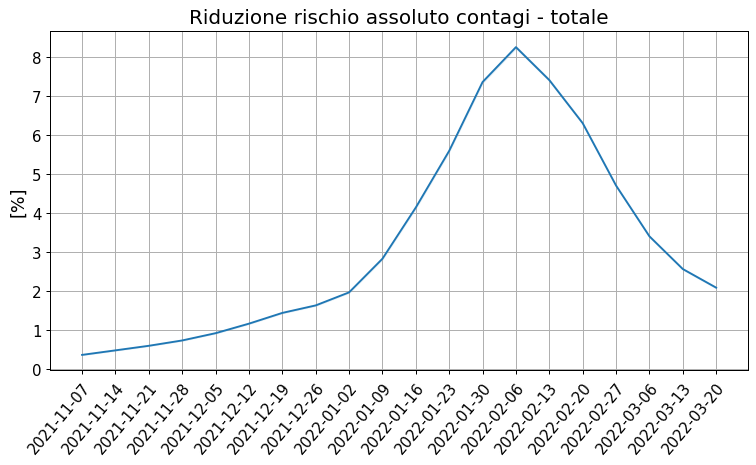

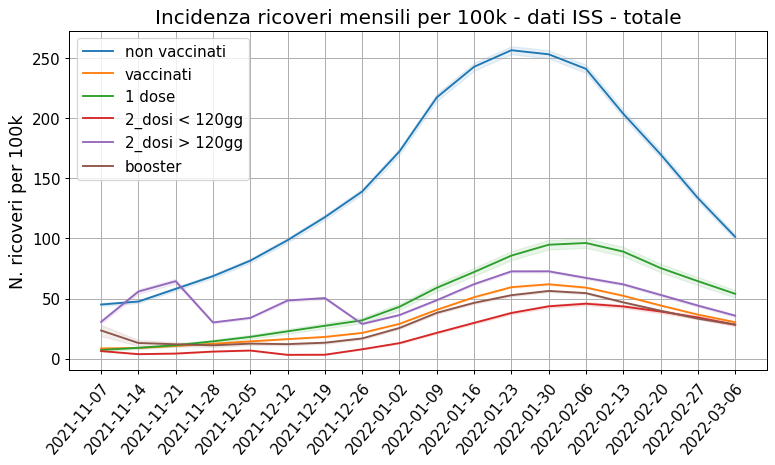

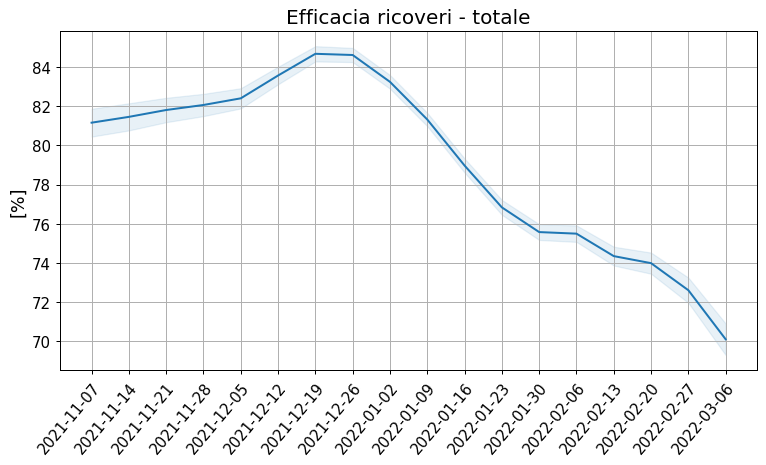

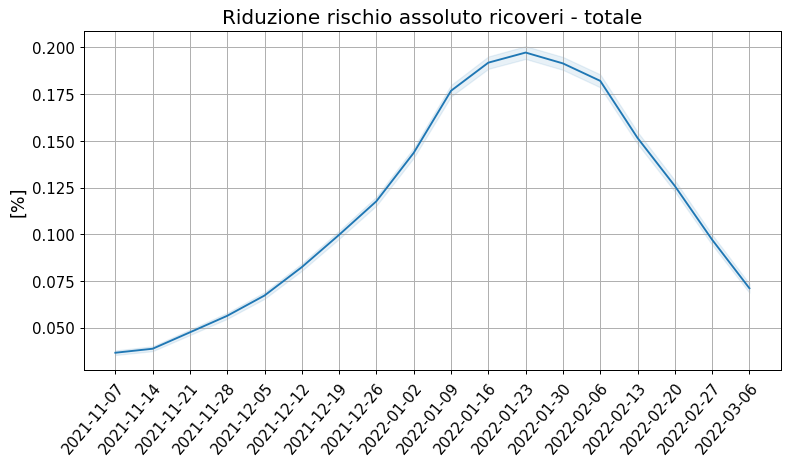

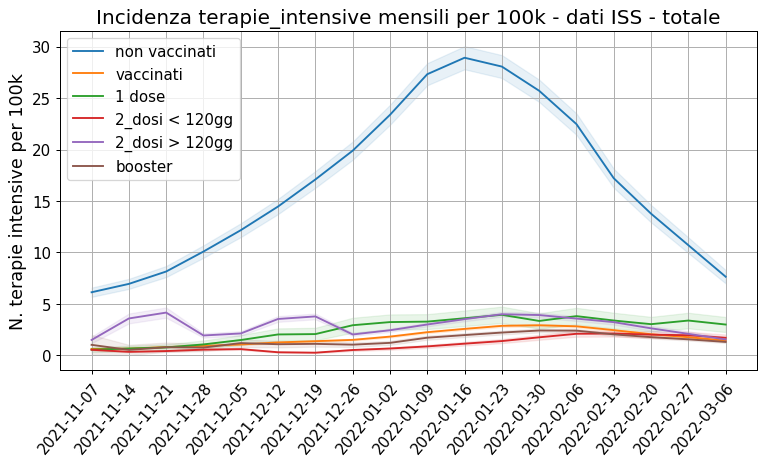

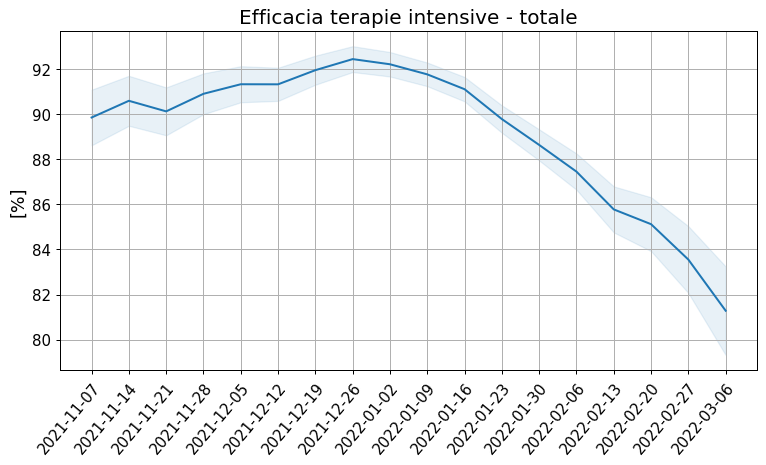

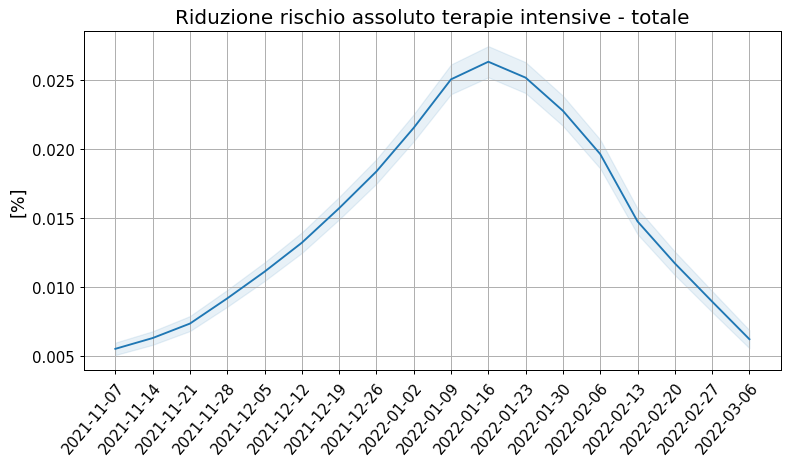

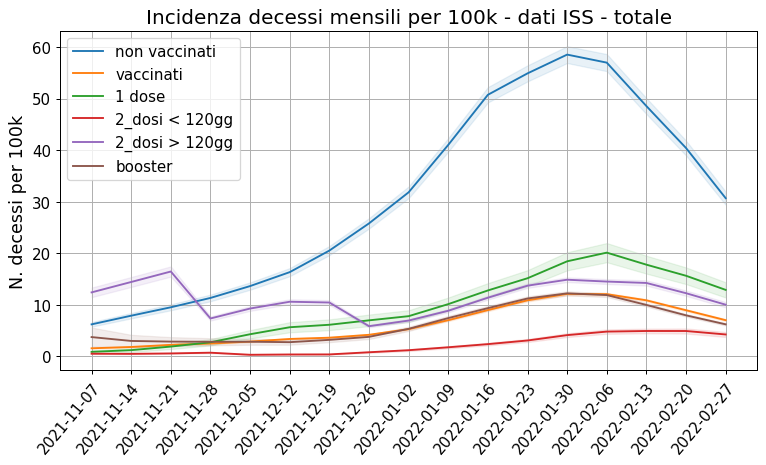

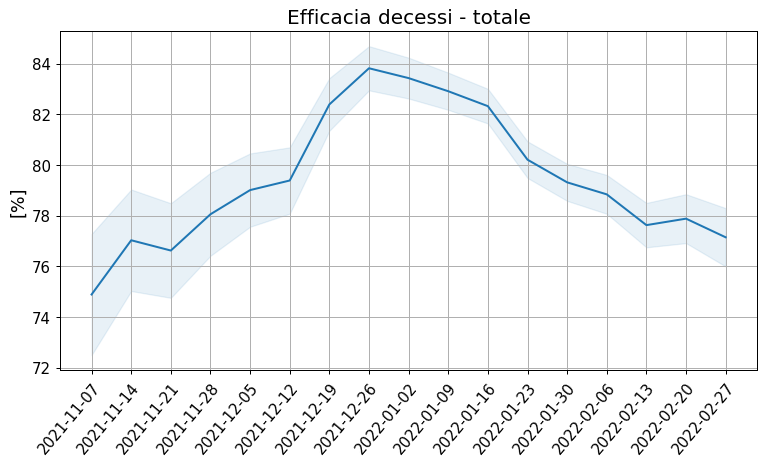

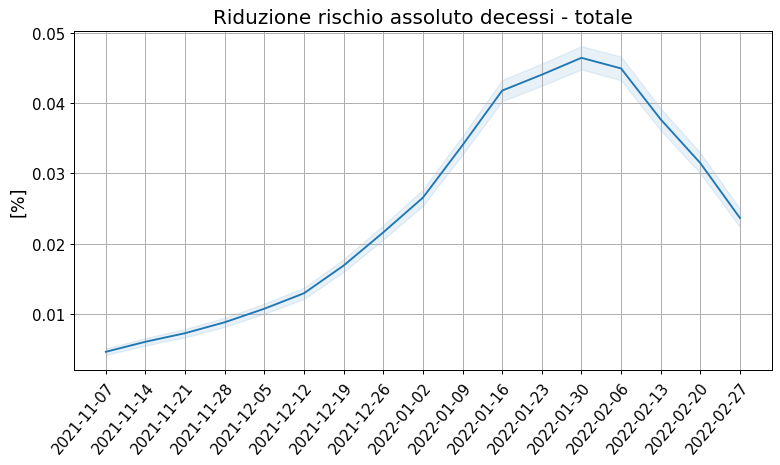

In [45]:
for s in ["contagi","ricoveri","terapie_intensive","decessi"]:
    for eta in df_iss.fascia_eta.unique():
        if eta not in ["totale"]:
            continue
        df_plt = df_iss[(df_iss.split==s) & (df_iss.fascia_eta==eta)]
        df_plt = df_plt.dropna()
        ynames = [f"{v}_100k" for v in ["vax", "no_vax"]]
        plot_incidence(split=s, age=eta)
        plot_efficacy(split=s, age=eta)
        plot_arr(split=s, age=eta)

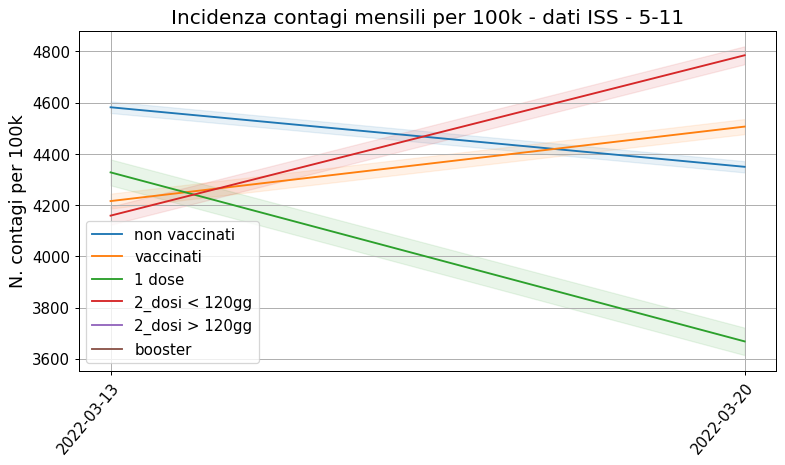

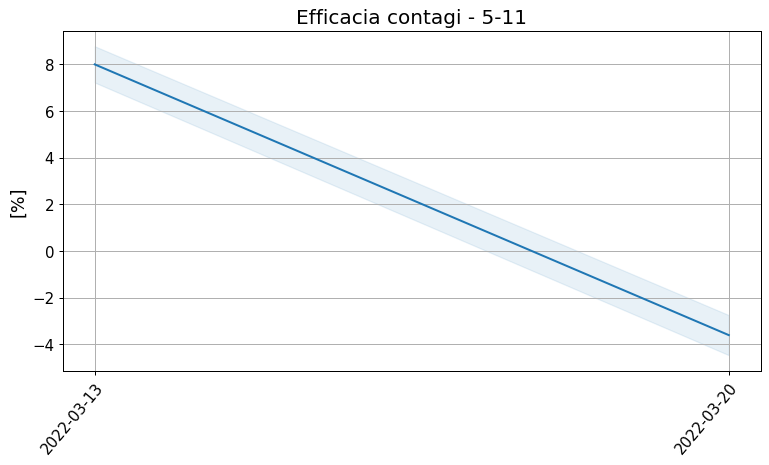

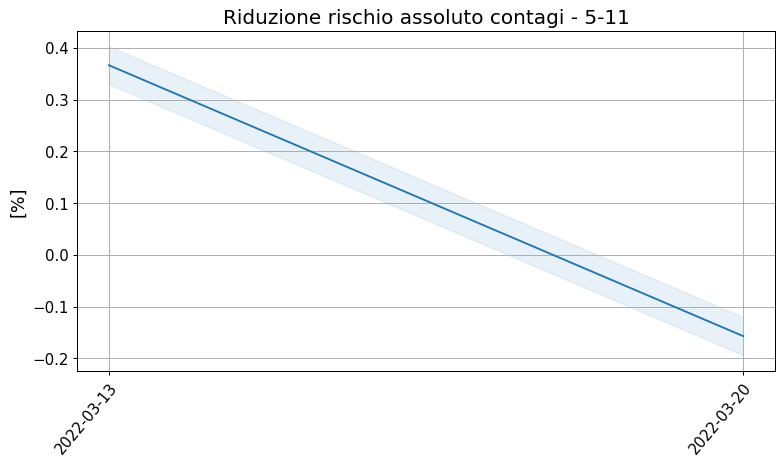

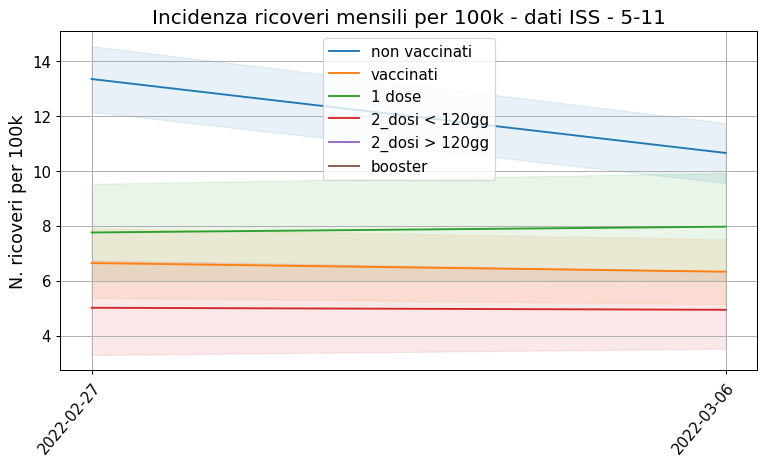

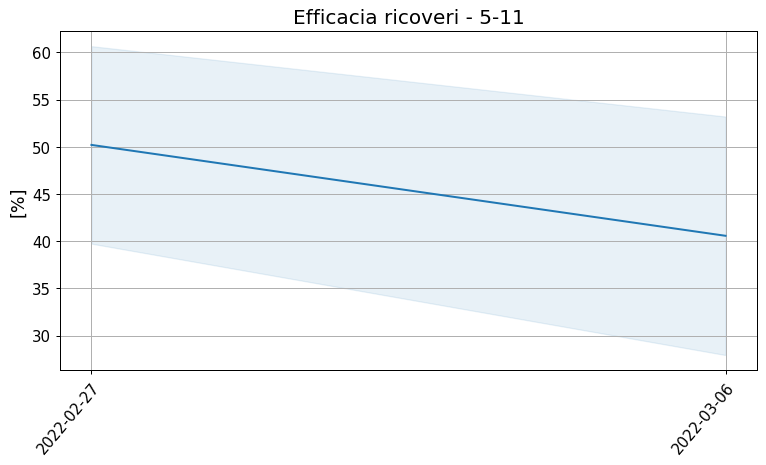

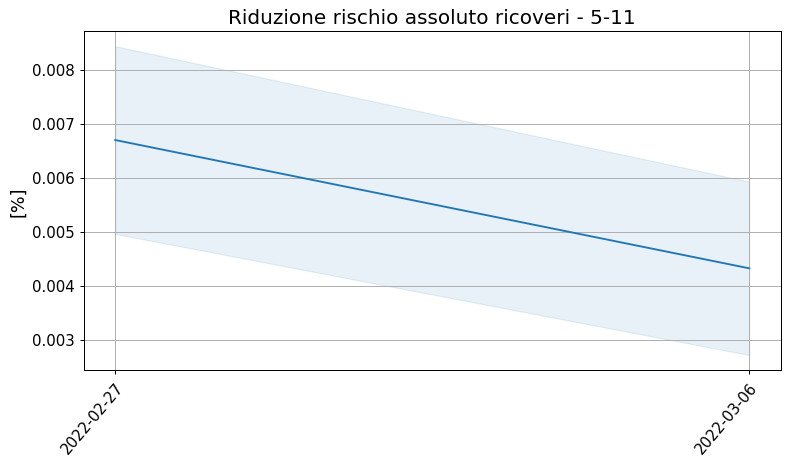

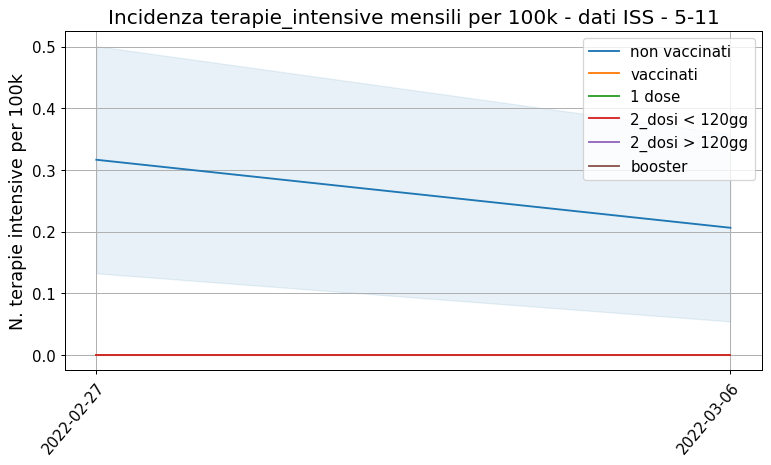

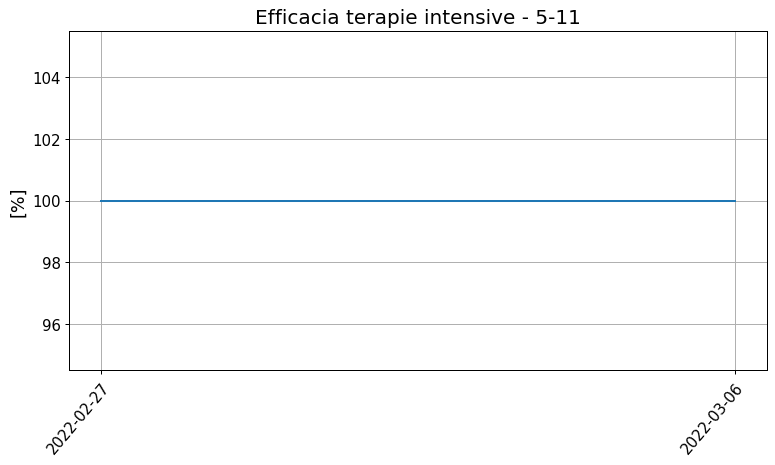

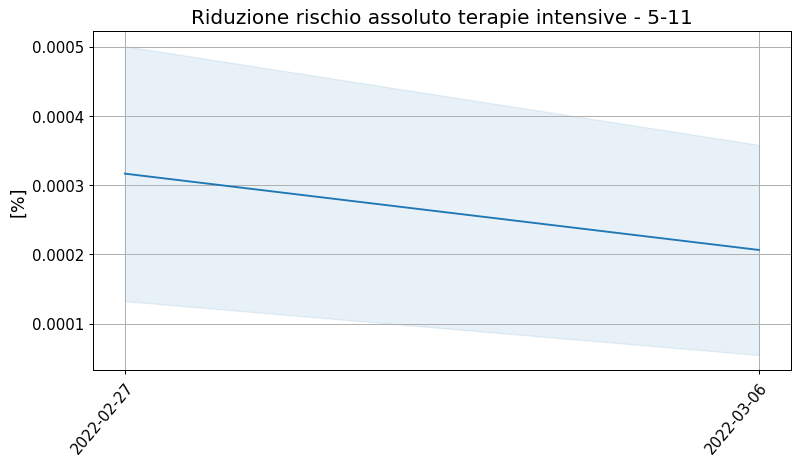

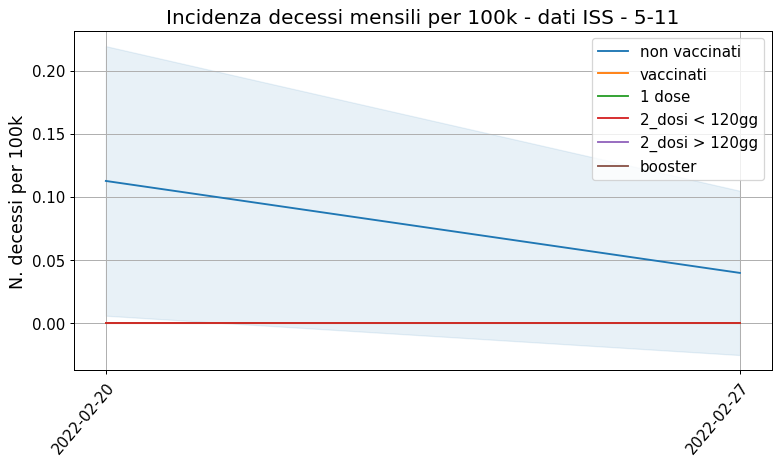

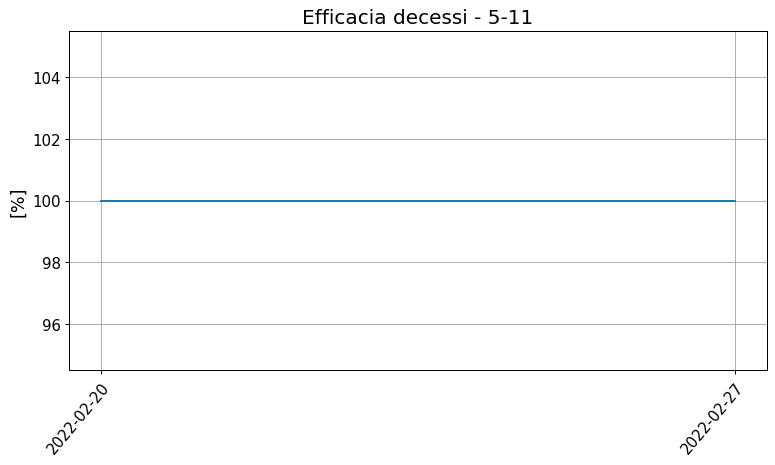

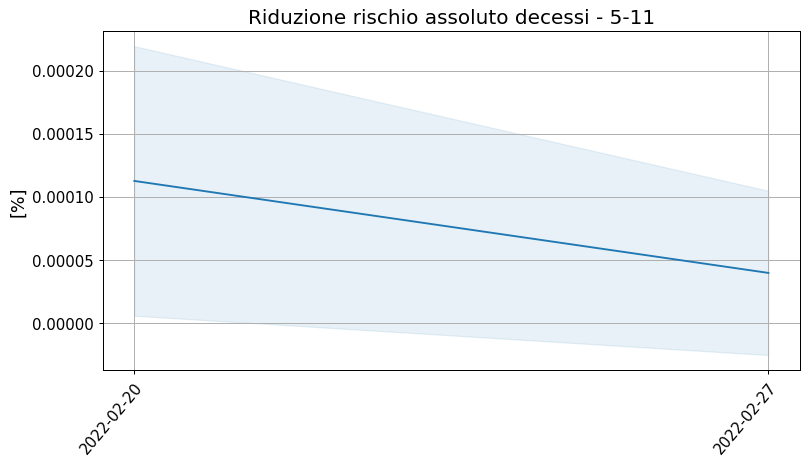

In [46]:
eta="5-11"
for s in ["contagi","ricoveri","terapie_intensive", "decessi"]:
    df_plt=df_iss[(df_iss["fascia_eta"]==eta) & (df_iss.split==s)]
    plot_incidence(split=s, age=eta)
    plot_efficacy(split=s, age=eta)
    plot_arr(split=s, age=eta)


In [20]:
df_iss[df_iss.fascia_eta=="5-11"]

90     50.561335
96     53.589327
192     1.768689
198     1.953112
294     0.000000
300     0.000000
396     0.000000
402     0.000000
Name: err_1_dose_100k, dtype: float64

In [29]:
def plot_vax_vs_no_vax(age: str, 
                       split: str):
    
    plt.figure(dpi=100, figsize=(10,5))
    df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)].reset_index()
    title = f"{split}"
    if age != "totale":
        title += f" {age}"
    createXYPlot(df_plt,
                 y=["no_vax_frac"],
                 labels=["frazione non vaccinati"],
                 colors=["r"],
                 x="data",
                 plots_folder="./plots",
                 days_interval=1,
                 linewidth=1.8,
                 title=title.replace("_"," ")
                )

In [30]:
df_iss["no_vax_frac_err"] = 1.645*np.sqrt((df_iss["no_vax_frac"]*df_iss["vax_frac"])/(df_iss["no_vax"] + df_iss["vax"]))
df_iss["no_vax_frac_err_lo"] = df_iss["no_vax_frac"] - df_iss["no_vax_frac_err"]
df_iss["no_vax_frac_err_hi"] = df_iss["no_vax_frac"] + df_iss["no_vax_frac_err"]

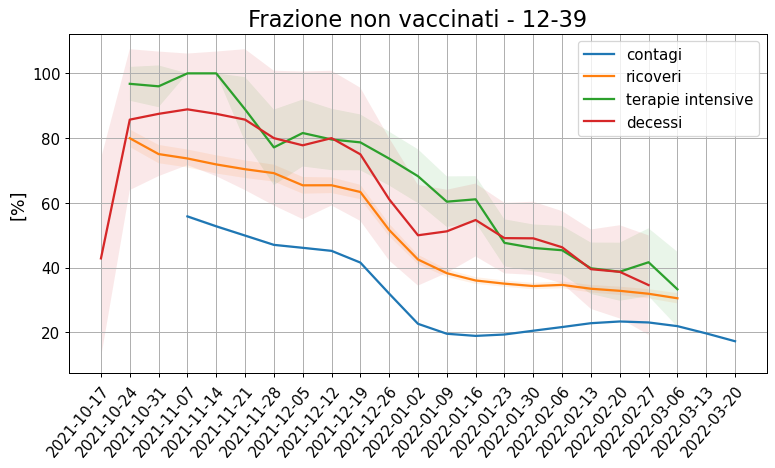

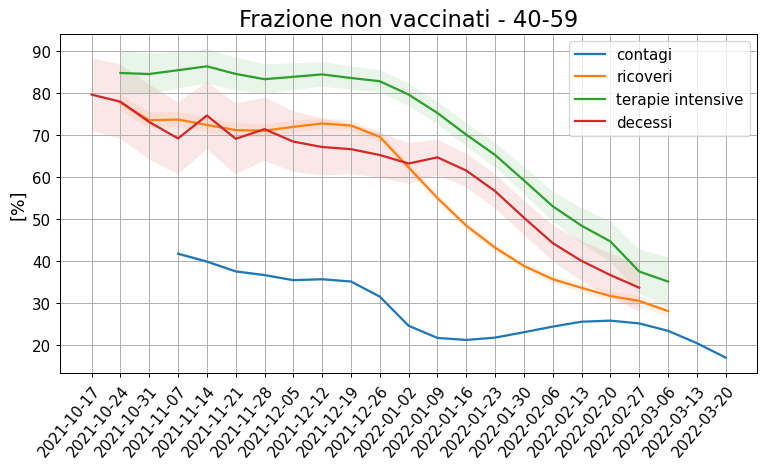

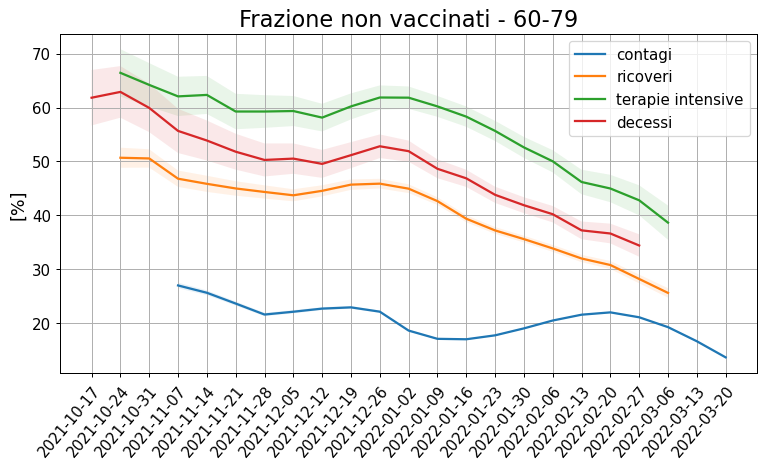

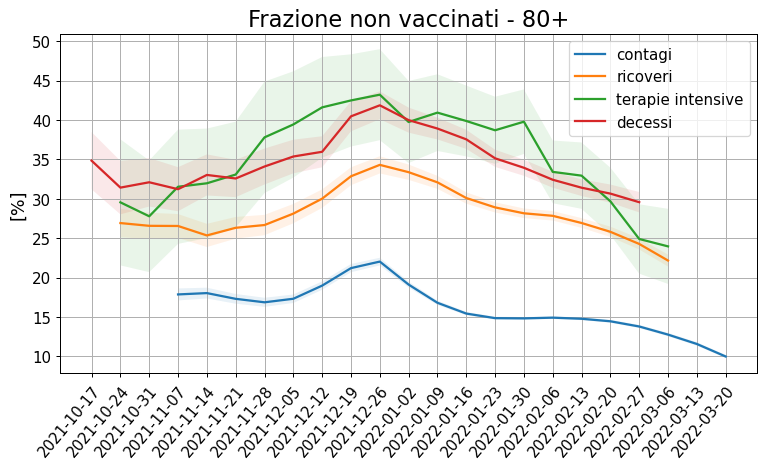

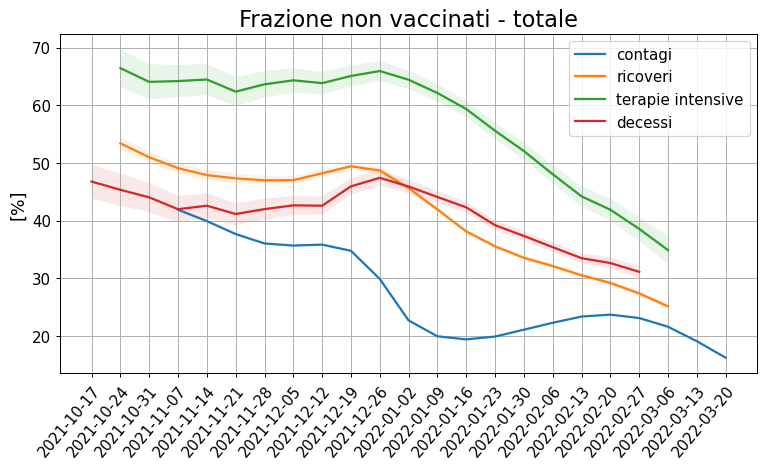

In [31]:
for age in sorted(age_values):
    plt.figure(dpi=90, figsize=(10,5))
    dates_str = []
    dates = []
    for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        dates_str += [x.strftime("%Y-%m-%d") for x in df_plt.data.unique()]
        dates += [x for x in df_plt.data.unique()]
        plt.plot(df_plt.data,
                 100*df_plt.no_vax_frac,
                 label=split.replace("_"," "),
                 linewidth=1.8
                )
        plt.fill_between(df_plt.data, 
                     100*df_plt.no_vax_frac_err_lo, 
                     100*df_plt.no_vax_frac_err_hi,
                     alpha=0.1
                    )
    title = f"Frazione non vaccinati - {age}"
    plt.title(title, fontsize=18)
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("[%]",fontsize=14)
    
    dates_str = sorted(list(set(dates_str)), reverse=False)
    dates = sorted(list(set(dates)), reverse=False)
    plt.xticks(dates,
               dates_str,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right")
    plt.savefig(f"{plots_folder}/frazione_no_vax_{age}", bbox_inches="tight", facecolor="w")

In [32]:
def plot_var_ages(split, varname="vax"):
    plt.figure(dpi=90, figsize=(10,5))
    for age in sorted(age_values):
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split=="terapie_intensive")]
        plt.plot(df_plt.data,
            df_plt[varname],
            label=age,
            linewidth=1.8)
    title = f"Totale {varname} {split}".replace("_", " ")
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(df_plt.data,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )

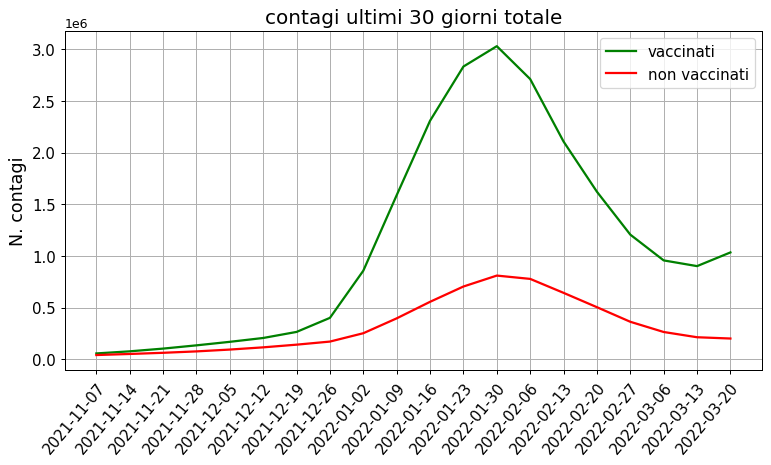

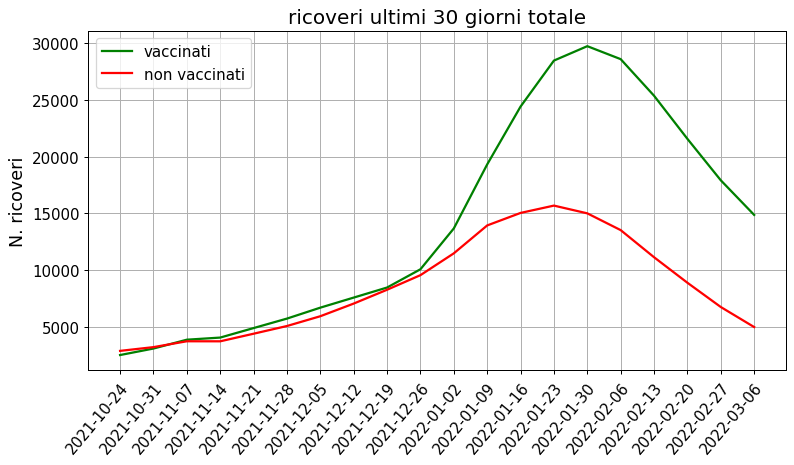

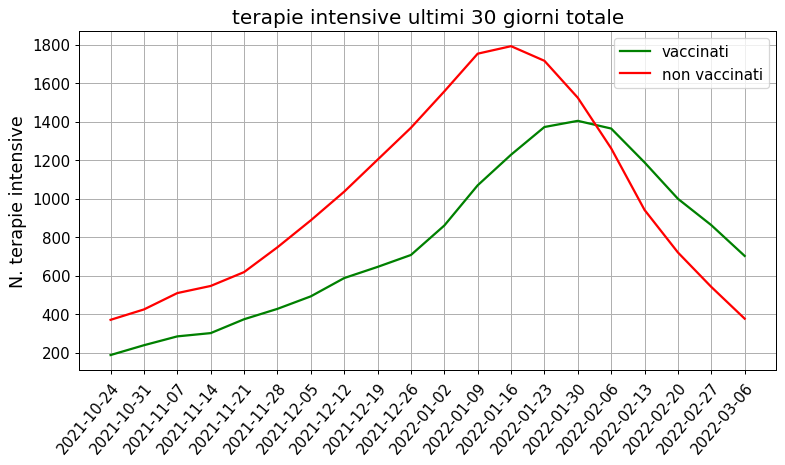

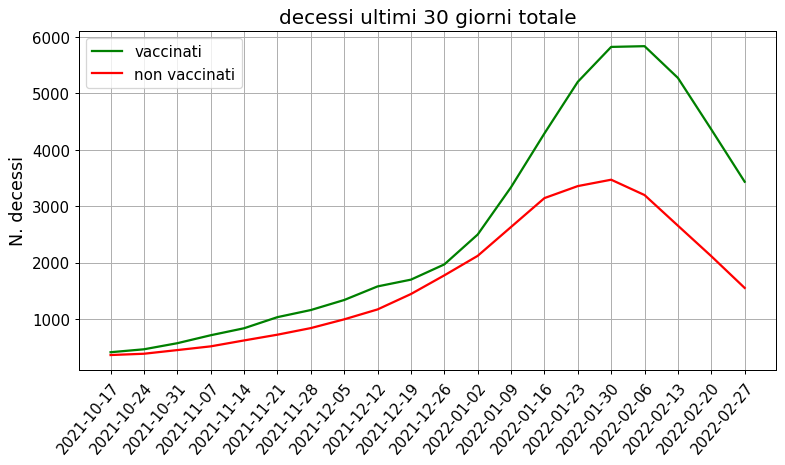

In [34]:
for age in age_values:
    if age != "totale":
        continue
    for split in splits:
        df_plt = df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        savename = f"{split}_{age}"
        yvars = ["vax", "no_vax"]
        savename += "_" + "_".join(yvars)
        createXYPlot(df_plt,
                     y=yvars,
                     x="data",
                     labels=["vaccinati", "non vaccinati"],
                     colors=["g","r"],
                     plots_folder=plots_folder,
                     linewidth=1.8,
                     days_interval=1,
                     title=f"{split} ultimi 30 giorni {age}".replace("_"," "),
                     savename=savename,
                     ytitle=f"N. {split}".replace("_"," "),
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90
                    )

In [35]:
def get_lethality(df: pd.DataFrame, 
                  age: str,
                  savename: str,
                  title: str,
                  yscale: str ="linear",
                  num_den: tuple = ("decessi","contagi"),
                 ):
    
    df_let = df[df.fascia_eta==age]
    value_cols = ["vax",
                  "no_vax",
                  "1_dose",
                  "2_dosi_lt_cut",
                  "2_dosi_gt_cut",
                  "booster",
                 ]
    df_pivot = df_let.pivot(index='data', columns=["split"], values=value_cols)
    cols = []
    for i in range(0,len(df_pivot.columns)):
        cols.append(df_pivot.columns.get_level_values(1)[i] + '_' + df_pivot.columns.get_level_values(0)[i])
    df_pivot.columns = cols
    
    for v in value_cols:
        df_pivot[f"letalita_{v}"] = df_pivot[f"{num_den[0]}_{v}"]/df_pivot[f"{num_den[1]}_{v}"]
        df_pivot[f"sd_letalita_{v}"] = np.sqrt(df_pivot[f"letalita_{v}"] * (1 - df_pivot[f"letalita_{v}"]) / df_pivot[f"contagi_{v}"])
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] - 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"hi_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] + 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"lo_err_letalita_{v}"].apply(lambda x: 0 if x < 0 else x)
    
    dates = df_pivot[[f"{num_den[0]}_no_vax",f"{num_den[1]}_no_vax"]].dropna().index
    if age == "totale":
        display(df_pivot[["contagi_no_vax", 
                          "ricoveri_no_vax", 
                          "letalita_no_vax",
                          "contagi_booster", 
                          "ricoveri_booster",
                          "letalita_booster"
                         ]])
        
    plt.figure(figsize=(10,5),dpi=90)
    var_dict = {"no_vax":"non vaccinati", 
                "vax":"vaccinati",
                "1_dose":"1 dose", 
                "2_dosi_lt_cut": "2 dosi < 120gg",
                "2_dosi_gt_cut": "2 dosi > 120gg",
                "booster": "booster"}
    for y in var_dict.keys():
        
        plt.plot(df_pivot.index, 
                 100*df_pivot[f"letalita_{y}"],
                 label=var_dict[y],
                 linewidth=1.8
                )
        plt.fill_between(df_pivot.index, 
                     100*df_pivot[f"lo_err_letalita_{y}"], 
                     100*df_pivot[f"hi_err_letalita_{y}"],
                     alpha=0.1
                    )
    plt.legend(fontsize=12)
    plt.title(f"{title} {age} - dati ISS",fontsize=17)
    plt.ylabel(f"{num_den[0]} / {num_den[1]} [%]".replace("_"," "),fontsize=14)
    _ = plt.yticks(fontsize=13)
    _ = plt.xticks(dates,
                   fontsize=13,
                   rotation=50, 
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right"
                  )
    plt.yscale(yscale)
    plt.savefig(f"{plots_folder}/{savename}.png", bbox_inches="tight", facecolor="w")
    return df_pivot

,contagi_no_vax,ricoveri_no_vax,letalita_no_vax,contagi_booster,ricoveri_booster,letalita_booster
data,,,,,,
2021-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-24,NaN,2890.0,NaN,NaN,17.0,NaN
2021-10-31,NaN,3220.0,NaN,NaN,35.0,NaN
2021-11-07,40182.0,3737.0,0.012817,286.0,69.0,0.038462
2021-11-14,50564.0,3733.0,0.012262,537.0,74.0,0.031657
2021-11-21,61908.0,4402.0,0.011662,969.0,121.0,0.029928
2021-11-28,75512.0,5081.0,0.011111,1710.0,176.0,0.026316
2021-12-05,93220.0,5944.0,0.010663,2652.0,272.0,0.023379
2021-12-12,114674.0,7059.0,0.010203,4219.0,368.0,0.019910


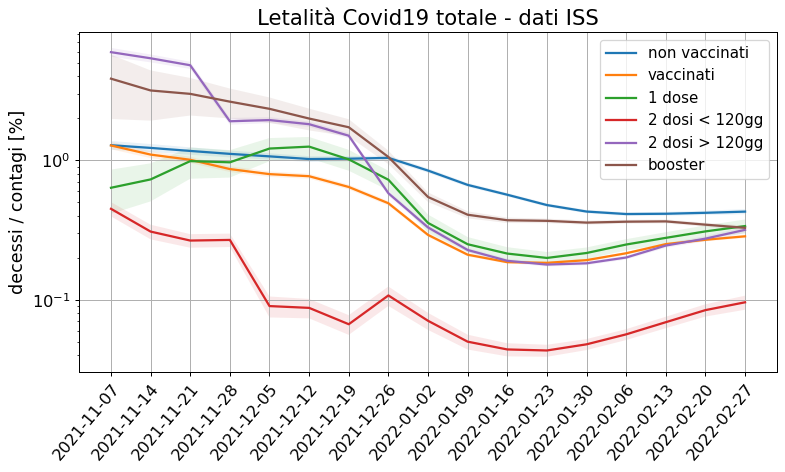

In [36]:
for age in age_values:
    if age != "totale":
        continue
    get_lethality(df_iss,
                  age=age,
                  savename=f"letalita_iss_{age}",
                  title="Letalità Covid19",
                  yscale="log"
                 )

,contagi_no_vax,ricoveri_no_vax,letalita_no_vax,contagi_booster,ricoveri_booster,letalita_booster
data,,,,,,
2021-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-24,NaN,2890.0,NaN,NaN,17.0,NaN
2021-10-31,NaN,3220.0,NaN,NaN,35.0,NaN
2021-11-07,40182.0,3737.0,0.093002,286.0,69.0,0.241259
2021-11-14,50564.0,3733.0,0.073827,537.0,74.0,0.137803
2021-11-21,61908.0,4402.0,0.071106,969.0,121.0,0.124871
2021-11-28,75512.0,5081.0,0.067287,1710.0,176.0,0.102924
2021-12-05,93220.0,5944.0,0.063763,2652.0,272.0,0.102564
2021-12-12,114674.0,7059.0,0.061557,4219.0,368.0,0.087224


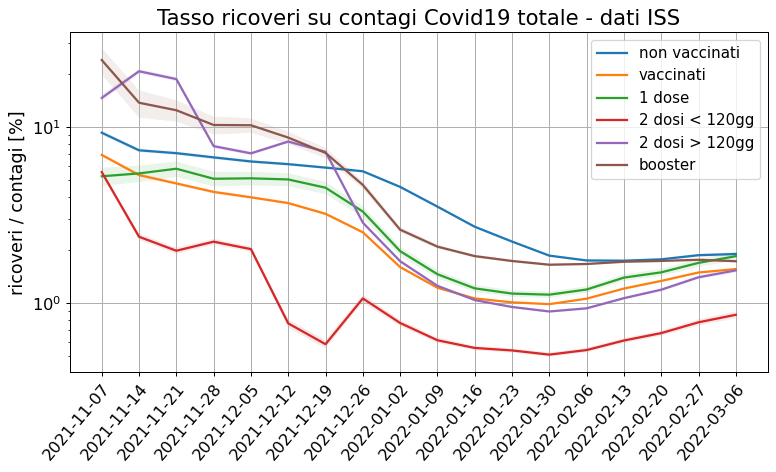

In [37]:
for age in age_values:
    if age != 'totale':
        continue
    get_lethality(df_iss,
                  age=age,
                  savename=f"ricoveri_contagi_iss_{age}",
                  title="Tasso ricoveri su contagi Covid19",
                  yscale="log",
                  num_den=("ricoveri","contagi")
                 )

,contagi_no_vax,ricoveri_no_vax,letalita_no_vax,contagi_booster,ricoveri_booster,letalita_booster
data,,,,,,
2021-10-17,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-24,NaN,2890.0,NaN,NaN,17.0,NaN
2021-10-31,NaN,3220.0,NaN,NaN,35.0,NaN
2021-11-07,40182.0,3737.0,0.012667,286.0,69.0,0.010490
2021-11-14,50564.0,3733.0,0.010798,537.0,74.0,0.005587
2021-11-21,61908.0,4402.0,0.009983,969.0,121.0,0.008256
2021-11-28,75512.0,5081.0,0.009892,1710.0,176.0,0.007018
2021-12-05,93220.0,5944.0,0.009515,2652.0,272.0,0.009804
2021-12-12,114674.0,7059.0,0.009034,4219.0,368.0,0.007822


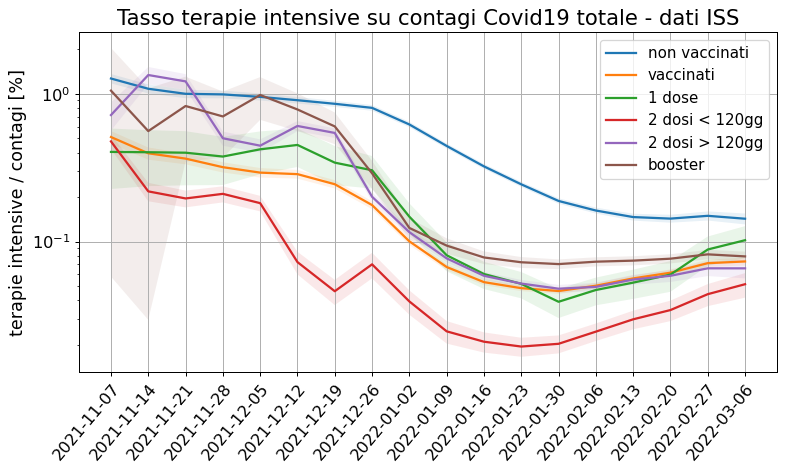

In [38]:
for age in age_values:
    if age != "totale":
        continue
    get_lethality(df_iss,
                  age=age,
                  savename=f"terapie_intensive_contagi_iss_{age}",
                  title="Tasso terapie intensive su contagi Covid19",
                  yscale="log",
                  num_den=("terapie_intensive","contagi"))

In [39]:
df_iss["no_vax_last7"] = df_iss["no_vax"] - df_iss.groupby(["fascia_eta","split"])["no_vax"].shift(1)
df_iss["vax_last7"] = df_iss["vax"] - df_iss.groupby(["fascia_eta","split"])["vax"].shift(1)

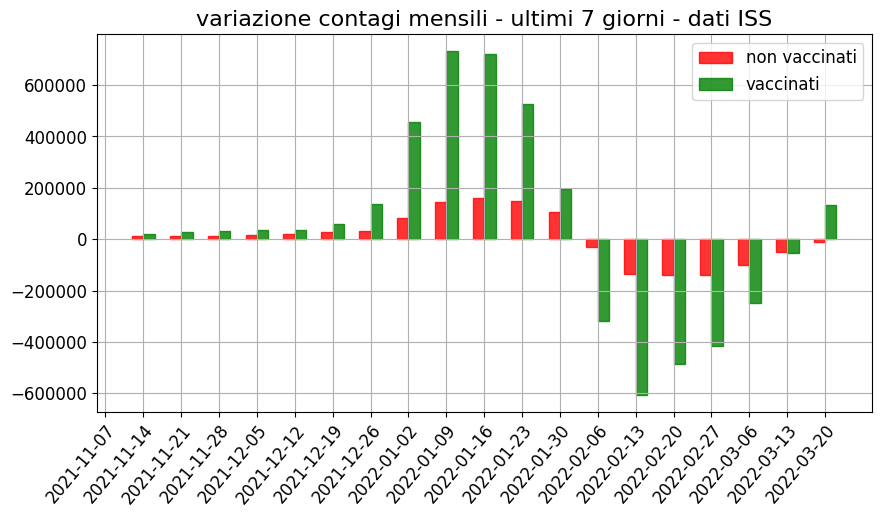

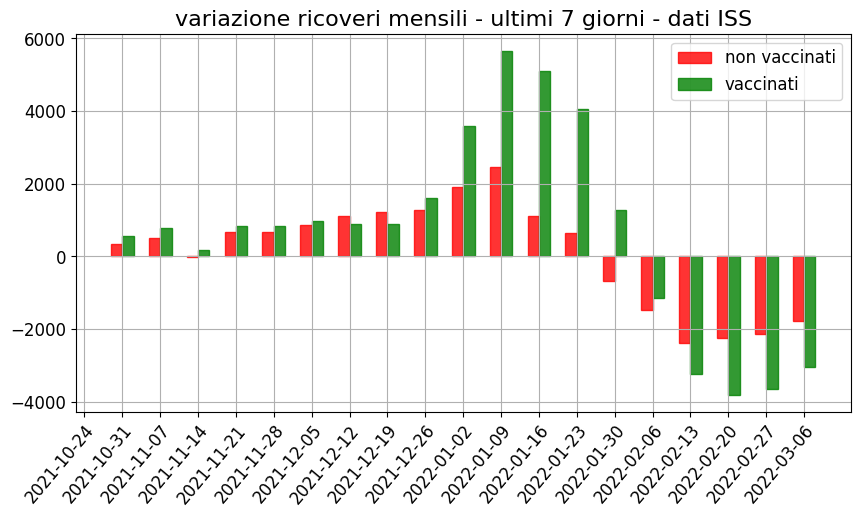

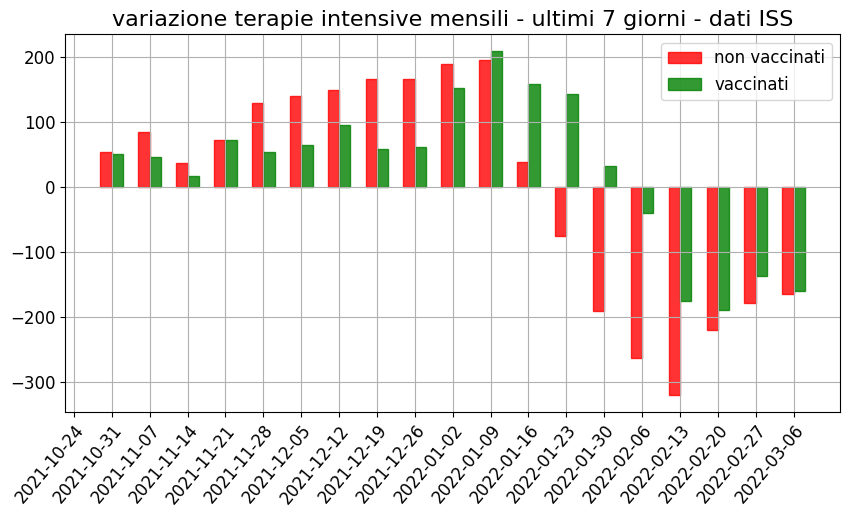

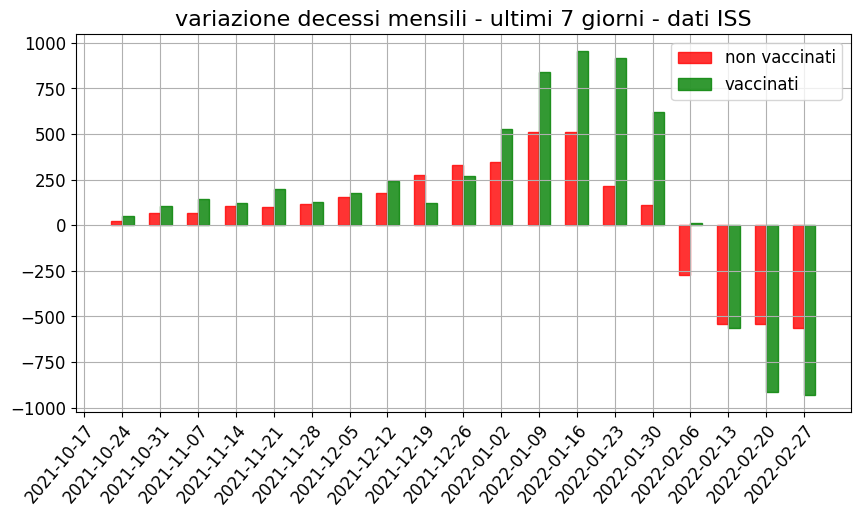

In [40]:
for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
    df_plt = df_iss[(df_iss.fascia_eta=="totale") & (df_iss.split==split)].reset_index()
    createXYPlot(df_plt,
             bar=True,
             bar_start=[-0.5, 0.5],
             alphas=[0.8,0.8],
             bar_width=0.3,
             x="data",
             y=["no_vax_last7","vax_last7"],
             labels=["non vaccinati", "vaccinati"],
             colors=["red","green"],
             linewidth=1.7,
             days_interval=1,
             plots_folder=plots_folder,
             title=f"variazione {split} mensili - ultimi 7 giorni - dati ISS".replace("_"," "),
             savename=f"{split}_ultimi7")

In [ ]:
df_pop

In [ ]:
df_pop_pivot = df_pop.pivot(index=["data_pop"],columns=["fascia_eta"]).reset_index()

In [ ]:
new_col_names = [x[0] + x[1] for x in df_pop_pivot.columns]

In [ ]:
df_pop_pivot.columns = df_pop_pivot.columns.droplevel(0)

In [ ]:
df_pop_pivot.columns = new_col_names

In [ ]:
df_pop_pivot

In [ ]:
from dateutil.relativedelta import relativedelta
path = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df_daily = getVariables(pd.read_csv(path))


df_daily["data"] = pd.to_datetime(df_daily["data"])
df_daily["data"] = df_daily["data"].apply(lambda x: x.date())
df_daily["data_prev"] = pd.to_datetime("2021-12-10")

In [ ]:
df_test = df_daily[(df_daily.data > datetime.strptime("2021-12-10","%Y-%m-%d").date()) & 
         (df_daily.data < datetime.strptime("2022-01-09","%Y-%m-%d").date())][["data","dow","nuovi_positivi"]]

In [ ]:
np.sum(df_test["nuovi_positivi"])

In [ ]:
np.sum(df_contagi[df_contagi.fascia_eta=="totale"][["vax","no_vax"]],axis=1)

In [ ]:
for v in ["ingressi_terapia_intensiva", "nuovi_positivi"]:
    df_daily[f"{v}_last_month"] = df_daily.apply(lambda x: df_daily.loc[(df_daily.data >= x.data_prev) & 
                                                                 (df_daily.data < x.data), v].sum(), axis=1)


In [ ]:
df_ti_comp      = df_ti[df_ti.fascia_eta=="totale"][["data","vax","no_vax"]]
df_contagi_comp = df_contagi[df_contagi.fascia_eta=="totale"][["data","vax","no_vax"]]

df_ti_comp["data"] = pd.to_datetime(df_ti_comp["data"]).apply(lambda x: x.date())
df_contagi_comp["data"] = pd.to_datetime(df_contagi_comp["data"]).apply(lambda x: x.date())

df_daily_comp = df_daily[["data","ingressi_terapia_intensiva_last_month","nuovi_positivi_last_month"]]

In [ ]:
df_comp_contagi = df_daily_comp.merge(df_contagi_comp, on="data", how="inner")
df_comp_contagi["tot"] = df_comp_contagi["vax"] + df_comp_contagi["no_vax"]
df_comp_contagi["diff"] = df_comp_contagi["tot"] - df_comp_contagi["nuovi_positivi_last_month"] 

In [ ]:
df_comp_contagi[["data","nuovi_positivi_last_month","tot","diff"]]

In [ ]:
df_comp = df_daily_comp.merge(df_ti_comp, on="data", how="inner")
df_comp["tot"] = df_comp["vax"] + df_comp["no_vax"]
df_comp["diff"] = df_comp["tot"] - df_comp["ingressi_terapia_intensiva_last_month"] 

In [ ]:
createXYPlot(df_comp,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Terapie Intensive)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

In [ ]:
createXYPlot(df_comp_contagi,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Contagi)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

In [ ]:
df_comp_contagi

In [ ]:
import pandas as pd
pd.read_csv("https://data.gov.il/dataset/covid-19/resource/8a51c65b-f95a-4fb8-bd97-65f47109f41f/download/event-among-vaccinated-126.csv")